In [1]:
import pandas as pd
CPI = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\CPI.csv")
PCE = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\PCE.csv")
OER = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\Owners' Equivalent Rent.csv")
House_prices = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\U.S. National Home Price.csv")
US_inflation_rate = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\US_inflation_rates.csv")
Consumer_Price_Index_Urban_Consumers = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\US House Price Project\Data\Counsumer price index for all consumers.csv")

In [2]:
#data filtering step to extract only twenty years data
start_date = '2002-01-01'
end_date = '2022-12-01'

CPI_filtered = CPI[(CPI['DATE'] >= start_date) & (CPI['DATE'] <= end_date)]
PCE_filtered = PCE[(PCE['DATE'] >= start_date) & (PCE['DATE'] <= end_date)]
OER_filtered = OER[(OER['DATE'] >= start_date) & (OER['DATE'] <= end_date)]
House_prices_filtered = House_prices[(House_prices['DATE'] >= start_date) & (House_prices['DATE'] <= end_date)]
US_inflation_rate_filtered = US_inflation_rate[(US_inflation_rate['date'] >= start_date) & (US_inflation_rate['date'] <= end_date)]
Consumer_Price_Index_Urban_Consumers_filtered = Consumer_Price_Index_Urban_Consumers[(Consumer_Price_Index_Urban_Consumers['DATE'] >= start_date) & (Consumer_Price_Index_Urban_Consumers['DATE'] <= end_date)]

In [3]:
# Merge DataFrames
df = CPI_filtered.merge(PCE_filtered, on='DATE', how='outer')
df = df.merge(OER_filtered, on='DATE', how='outer')
df = df.merge(House_prices_filtered, on='DATE', how='outer')
df = df.merge(Consumer_Price_Index_Urban_Consumers_filtered, on='DATE', how='outer')

# Drop duplicate 'DATE' columns from merged DataFrames
df = df.loc[:, ~df.columns.duplicated()]
df = df.drop_duplicates(subset='DATE')

In [4]:
df

,DATE,CPIEHOUSE,PCE,CUSR0000SEHC01,CSUSHPISA,CUSR0000SAH1
0,2002-01-01,186.500,7184.6,211.400,117.144,205.100
1,2002-02-01,187.600,7225.2,212.000,117.845,206.000
2,2002-03-01,188.400,7243.4,212.700,118.687,206.300
3,2002-04-01,188.700,7312.5,213.400,119.611,207.000
4,2002-05-01,188.900,7288.9,213.900,120.724,207.400
...,...,...,...,...,...,...
247,2022-08-01,320.808,17692.2,366.079,301.596,356.910
248,2022-09-01,322.979,17804.0,368.978,299.380,359.565
249,2022-10-01,324.476,17915.1,371.282,298.922,362.160
250,2022-11-01,325.493,17892.5,373.717,298.312,364.480


In [5]:
US_inflation_rate_filtered

,date,value
660,2002-01-01,177.700
661,2002-02-01,178.000
662,2002-03-01,178.500
663,2002-04-01,179.300
664,2002-05-01,179.500
...,...,...
907,2022-08-01,295.320
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598


In [6]:
d1 = pd.DataFrame(df)
d2 = pd.DataFrame(US_inflation_rate_filtered)

data = pd.merge(d1, d2, left_on = 'DATE', right_on='date', how = 'outer')

data = data.drop('date', axis=1)

In [7]:
data

,DATE,CPIEHOUSE,PCE,CUSR0000SEHC01,CSUSHPISA,CUSR0000SAH1,value
0,2002-01-01,186.500,7184.6,211.400,117.144,205.100,177.700
1,2002-02-01,187.600,7225.2,212.000,117.845,206.000,178.000
2,2002-03-01,188.400,7243.4,212.700,118.687,206.300,178.500
3,2002-04-01,188.700,7312.5,213.400,119.611,207.000,179.300
4,2002-05-01,188.900,7288.9,213.900,120.724,207.400,179.500
...,...,...,...,...,...,...,...
247,2022-08-01,320.808,17692.2,366.079,301.596,356.910,295.320
248,2022-09-01,322.979,17804.0,368.978,299.380,359.565,296.539
249,2022-10-01,324.476,17915.1,371.282,298.922,362.160,297.987
250,2022-11-01,325.493,17892.5,373.717,298.312,364.480,298.598


In [8]:
data.columns

Index(['DATE', 'CPIEHOUSE', 'PCE', 'CUSR0000SEHC01', 'CSUSHPISA',
       'CUSR0000SAH1', 'value'],
      dtype='object')

In [9]:
financial_data = pd.DataFrame(data)

# Renaming columns
financial_data.rename(columns={
    'CUSR0000SEHC01': 'OER',
    'CSUSHPISA': 'US_National_Home_Prices',
    'CUSR0000SAH1': 'Consumer_Price_Index',
    'value': 'Inflation_Rate'
}, inplace=True)

print(financial_data.head())

         DATE  CPIEHOUSE     PCE    OER  US_National_Home_Prices  \
0  2002-01-01      186.5  7184.6  211.4                  117.144   
1  2002-02-01      187.6  7225.2  212.0                  117.845   
2  2002-03-01      188.4  7243.4  212.7                  118.687   
3  2002-04-01      188.7  7312.5  213.4                  119.611   
4  2002-05-01      188.9  7288.9  213.9                  120.724   

   Consumer_Price_Index  Inflation_Rate  
0                 205.1           177.7  
1                 206.0           178.0  
2                 206.3           178.5  
3                 207.0           179.3  
4                 207.4           179.5  


In [10]:
financial_data

,DATE,CPIEHOUSE,PCE,OER,US_National_Home_Prices,Consumer_Price_Index,Inflation_Rate
0,2002-01-01,186.500,7184.6,211.400,117.144,205.100,177.700
1,2002-02-01,187.600,7225.2,212.000,117.845,206.000,178.000
2,2002-03-01,188.400,7243.4,212.700,118.687,206.300,178.500
3,2002-04-01,188.700,7312.5,213.400,119.611,207.000,179.300
4,2002-05-01,188.900,7288.9,213.900,120.724,207.400,179.500
...,...,...,...,...,...,...,...
247,2022-08-01,320.808,17692.2,366.079,301.596,356.910,295.320
248,2022-09-01,322.979,17804.0,368.978,299.380,359.565,296.539
249,2022-10-01,324.476,17915.1,371.282,298.922,362.160,297.987
250,2022-11-01,325.493,17892.5,373.717,298.312,364.480,298.598


In [11]:
financial_data.isnull().sum()

DATE                       0
CPIEHOUSE                  0
PCE                        0
OER                        0
US_National_Home_Prices    0
Consumer_Price_Index       0
Inflation_Rate             0
dtype: int64

Correlations with US_National_Home_Prices:
US_National_Home_Prices    1.000000
PCE                        0.868724
CPIEHOUSE                  0.867137
Consumer_Price_Index       0.861771
OER                        0.858306
Inflation_Rate             0.822250
Name: US_National_Home_Prices, dtype: float64

The variable most correlated with 'US_National_Home_Prices' is: PCE


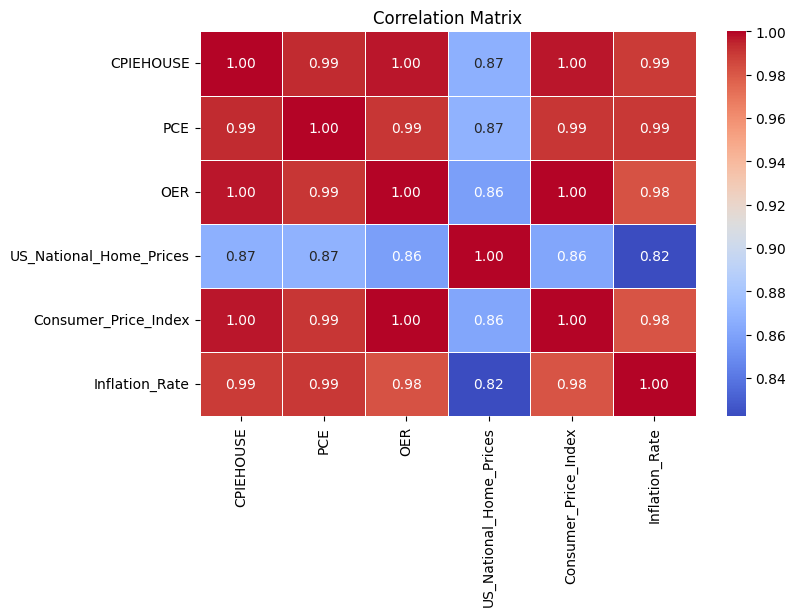

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_value = financial_data[['CPIEHOUSE', 'PCE', 'OER', 'US_National_Home_Prices', 'Consumer_Price_Index', 'Inflation_Rate']]

# correlation matrix
correlation_matrix = numeric_value.corr()

# Print correlations with 'US_National_Home_Prices'
correlation_with_home_prices = correlation_matrix['US_National_Home_Prices'].sort_values(ascending=False)
print("Correlations with US_National_Home_Prices:")
print(correlation_with_home_prices)

# Print the variable with highest correlation
most_correlated_variable = correlation_with_home_prices.index[1]  # Index 0 is 'US_National_Home_Prices'
print("\nThe variable most correlated with 'US_National_Home_Prices' is:", most_correlated_variable)

# heatmap of the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


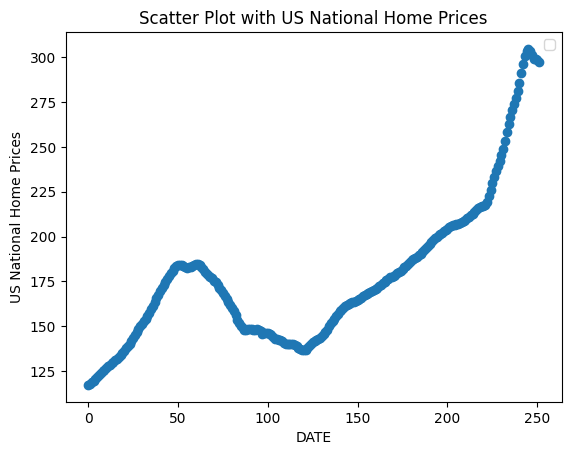

In [13]:
import matplotlib.pyplot as plt

x = financial_data.index
y = financial_data['US_National_Home_Prices']
    
plt.scatter(x, y)

plt.ylabel('US National Home Prices')
plt.xlabel('DATE')
plt.legend()
plt.title('Scatter Plot with US National Home Prices')
plt.show()

In [14]:
financial_data['DATE'] = pd.to_datetime(financial_data['DATE'], format='%Y-%m-%d')
financial_data['DATE']

0     2002-01-01
1     2002-02-01
2     2002-03-01
3     2002-04-01
4     2002-05-01
         ...    
247   2022-08-01
248   2022-09-01
249   2022-10-01
250   2022-11-01
251   2022-12-01
Name: DATE, Length: 252, dtype: datetime64[ns]

In [15]:
financial_data['Year'] = financial_data['DATE'].dt.year
financial_data['Month'] = financial_data['DATE'].dt.month
financial_data['Year'].head(20)

0     2002
1     2002
2     2002
3     2002
4     2002
5     2002
6     2002
7     2002
8     2002
9     2002
10    2002
11    2002
12    2003
13    2003
14    2003
15    2003
16    2003
17    2003
18    2003
19    2003
Name: Year, dtype: int32

In [16]:
financial_data['PCE'].tail(10)

242    17203.6
243    17310.5
244    17384.8
245    17550.0
246    17556.4
247    17692.2
248    17804.0
249    17915.1
250    17892.5
251    17943.6
Name: PCE, dtype: float64

In [17]:
financial_data.tail(5)

,DATE,CPIEHOUSE,PCE,OER,US_National_Home_Prices,Consumer_Price_Index,Inflation_Rate,Year,Month
247,2022-08-01,320.808,17692.2,366.079,301.596,356.910,295.320,2022,8
248,2022-09-01,322.979,17804.0,368.978,299.380,359.565,296.539,2022,9
249,2022-10-01,324.476,17915.1,371.282,298.922,362.160,297.987,2022,10
250,2022-11-01,325.493,17892.5,373.717,298.312,364.480,298.598,2022,11
251,2022-12-01,327.600,17943.6,376.659,297.471,367.355,298.990,2022,12


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


x_year = financial_data['Year'].values.reshape(-1, 1)  
x_month = financial_data['Month'].values.reshape(-1, 1)
x_pce = financial_data['PCE'].values.reshape(-1, 1) 
y = financial_data['US_National_Home_Prices'].values.reshape(-1, 1) 

# Combine the date and PCE values
x_combined = np.column_stack((x_year, x_month, x_pce))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)

# Decision Tree regression
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Predict house prices
new_year = 2002
new_month = 3
new_pce = 7161.4 #if you want accurate reult use PCE script for that

# Reshape the input for prediction
new_data = np.array([[new_year, new_month, new_pce]])

predicted_house_price = model.predict(new_data)   # Predict house price

print(f"Predicted House Price: {predicted_house_price[0]}")

Predicted House Price: 117.144


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the test set
y_test_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")

Mean Squared Error on Test Set: 4.07429350980393
R-squared on Test Set: 0.9966914823726227
